<h2 style="color: green">1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.<h2>

In [98]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [99]:
data = pd.DataFrame({
    "Gradation":["Grad1", "Grad2", "Grad3", "Grad4", "Grad5"],
    "Group1":[13, 8, 26, 6, 32],
    "Group2":[30, 45, 59, 12, 3]
})
data

,Gradation,Group1,Group2
0,Grad1,13,30
1,Grad2,8,45
2,Grad3,26,59
3,Grad4,6,12
4,Grad5,32,3


<h2 style="color: green">2. Побудувати графік, що відображає розподіл ознак в групах.</h2>

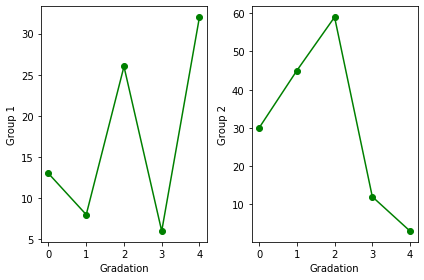

In [100]:
plt.subplot(1,2,1)
plt.plot(data["Group1"],marker = 'o', color='g')
plt.xlabel("Gradation")
plt.ylabel("Group 1")

plt.subplot(1,2,2)
plt.plot(data["Group2"],marker = 'o', color='g')
plt.xlabel("Gradation")
plt.ylabel("Group 2")

plt.tight_layout()

<h2 style="color: green">3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.</h2>

In [101]:
def pirsonfunc(data, level):
    data1 = sum(data.iloc[:,1])
    data2 = sum(data.iloc[:,2])
    if data1 == data2:
        print("good")
    elif data1 < data2:
        for i in range(data.shape[0]):
            tempi = data.iloc[i,1]
            temp = (tempi * 100)/data1
            data.iloc[i,1] = (temp * data2)/100
    else:
        for i in range(data.shape[0]):
            tempi = data.iloc[i,2]
            temp = (tempi * 100)/data2
            data.iloc[i,2] = (temp * data1)/100
    
    data['ni-ni^2'] = None
    data['ni-ni^2'] = (data.iloc[:,1] - data.iloc[:,2])**2
    data["(ni-ni)^2/ni^2"] = None
    data["(ni-ni)^2/ni^2"] = data["ni-ni^2"]/data.iloc[:,2]
    xi = sum(data["(ni-ni)^2/ni^2"])
    print("Хі квадрат за даними: ", xi)
    print("Число ступенів свободи: ", data.shape[0]-1)
    c = pd.read_excel("Таблиця критичних значень для критерію Пірсона.xlsx").iloc[data.shape[0]-1, 1 if(level == 0.01) else 2]
    print("X^2 критичне: ", c)
    return "Розбіжність існує " + str(xi) + "(Дано) > " + str(c) + "(критичне)" if (xi > c) else "Розбіжності немає" 
pirsonfunc(data, 0.01)

Хі квадрат за даними:  965.9557788073689
Число ступенів свободи:  4
X^2 критичне:  13.3


'Розбіжність існує 965.9557788073689(Дано) > 13.3(критичне)'

<h3 style="color: green">4. Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:<br/>
Ознака	Група 1	Група 2<br/>
Градація ознаки 1	 𝑛11 	 𝑛21<br/> 
Градація ознаки 2	 𝑛12 	 𝑛22 <br/>
Градація ознаки 3	 𝑛13 	 𝑛23 <br/>
Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).</h3>

In [102]:
data_new = pd.DataFrame({
    "Gradation":["Grad1", "Grad2", "Grad3", "Grad4", "Grad5"],
    "Group1":[13, 8, 26, 6, 32],
    "Group2":[30, 45, 59, 12, 3],
    "PercentG1%": None,
    "PercentG2%": None
})
data_new["PercentG1%"] = round(data_new["Group1"]/sum(data_new["Group1"])*100)
data_new["PercentG2%"] = round(data_new["Group2"]/sum(data_new["Group2"])*100)

In [103]:
data_new

,Gradation,Group1,Group2,PercentG1%,PercentG2%
0,Grad1,13,30,15.0,20.0
1,Grad2,8,45,9.0,30.0
2,Grad3,26,59,31.0,40.0
3,Grad4,6,12,7.0,8.0
4,Grad5,32,3,38.0,2.0
